<a href="https://www.kaggle.com/code/ravin235/linear-to-classification?scriptVersionId=112214347" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [2]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
df = df[['radius_mean','diagnosis']]

In [4]:
df.head()

,radius_mean,diagnosis
0,17.99,1
1,20.57,1
2,19.69,1
3,11.42,1
4,20.29,1


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')


<AxesSubplot:xlabel='radius_mean', ylabel='diagnosis'>

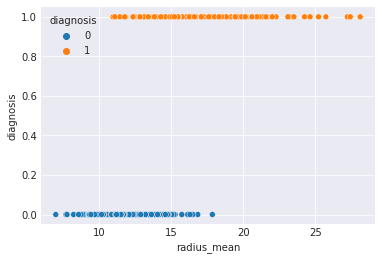

In [6]:
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', data = df,hue='diagnosis')

# Chosen Boundary Classifiers

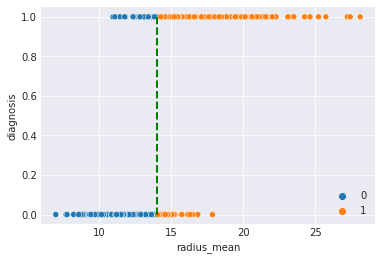

In [7]:
def boundary_classifier(target_boundary,x):
  result = []
  for i in x:
    if i > target_boundary:
      result.append(1)
    else:
      result.append(0)
  return result

chosen_boundary = 14
y_pred_b14 = boundary_classifier(chosen_boundary, df['radius_mean'])
df['predicted_b14'] = y_pred_b14
y_true = df['diagnosis']
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', hue = 'predicted_b14', data = df)
plt.plot([chosen_boundary, chosen_boundary], [0, 1], 'g--', linewidth = 2)
plt.legend(loc='lower right')

In [8]:
from sklearn import metrics
accuracy_b14 = metrics.accuracy_score(y_true, y_pred_b14)
accuracy_b14

0.8523725834797891

# Linear Regression Classifiers

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
x = df['radius_mean'].values.reshape(-1,1)
y = df['diagnosis'].values

In [11]:
LinearModel = LinearRegression()
LinearModel.fit(x,y)

LinearRegression()

In [12]:
linear_predictions = LinearModel.predict(x)

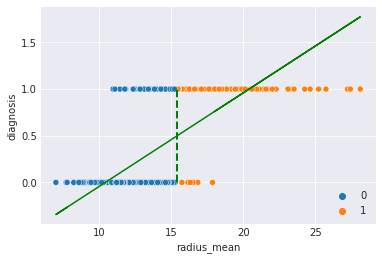

In [13]:
def boundary_classifier(target_boundary,x):
  result = []
  for i in x:
    if i > target_boundary:
      result.append(1)
    else:
      result.append(0)
  return result

decision_boundary = 0.5
y_pred_lr = boundary_classifier(decision_boundary, linear_predictions)
df['predicted_lr'] = y_pred_lr
y_true = df['diagnosis']
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', hue = 'predicted_lr', data = df)
plt.legend(loc='lower right')
plt.plot([15.4, 15.4],[0, 1], 'g--', linewidth = 2)
plt.plot(x, LinearModel.predict(x), color = 'green')



In [14]:
accuracy_lr = metrics.accuracy_score(y_true,y_pred_lr)
accuracy_lr

0.875219683655536

# Linear Regression Classifiers with outliers

In [15]:
df_outliers = pd.DataFrame([[1,150],[1,155]], columns=['diagnosis','radius_mean'])

In [16]:
df_new = df.append(df_outliers,ignore_index=True)

In [17]:
df_new

,radius_mean,diagnosis,predicted_b14,predicted_lr
0,17.99,1,1.0,1.0
1,20.57,1,1.0,1.0
2,19.69,1,1.0,1.0
3,11.42,1,0.0,0.0
4,20.29,1,1.0,1.0
...,...,...,...,...
566,16.60,1,1.0,1.0
567,20.60,1,1.0,1.0
568,7.76,0,0.0,0.0
569,150.00,1,NaN,NaN


<AxesSubplot:xlabel='radius_mean', ylabel='diagnosis'>

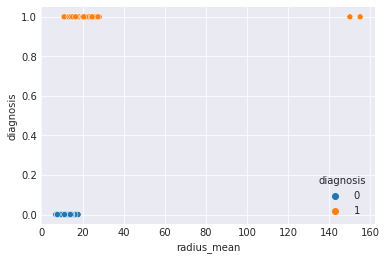

In [18]:
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', data = df_new,hue='diagnosis')

In [19]:
x1 = df_new['radius_mean'].values.reshape(-1,1)
y1 = df_new['diagnosis'].values

In [20]:
LinearModelOutliers = LinearRegression()
LinearModelOutliers.fit(x1,y1)

LinearRegression()

In [21]:
predictions_outliers = LinearModelOutliers.predict(x1)

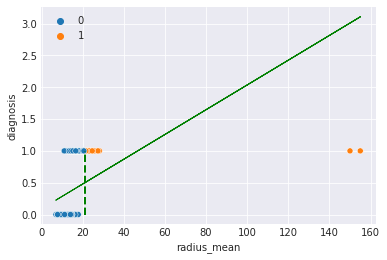

In [22]:
def boundary_classifier(target_boundary,x):
  result = []
  for i in x:
    if i > target_boundary:
      result.append(1)
    else:
      result.append(0)
  return result
     
decision_boundary = 0.5
y_pred_outliers = boundary_classifier(decision_boundary, predictions_outliers)
df_new['predicted_outliers'] = y_pred_outliers
y_true_outliers= df_new['diagnosis']
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', hue = 'predicted_outliers', data = df_new)
plt.legend(loc='upper left')
plt.plot([21, 21],[0, 1], 'g--', linewidth = 2)
plt.plot(x1, LinearModelOutliers.predict(x1), color = 'green',linewidth=1)


In [23]:
accuracy_outliers =  metrics.accuracy_score(y_true_outliers,y_pred_outliers)
accuracy_outliers

0.6672504378283712